In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-bright')
plt.style.use('seaborn-whitegrid')


Plot

In [3]:
def read_data(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            name_tail_reg = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+'reg'+str(True)+'.csv'
            if method == 'entropy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                name = dir + '/'+method+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo+reg' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_reg
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)


            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            elif method =='forest0':
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)['forest'].values
                data = np.sort(data)
                data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

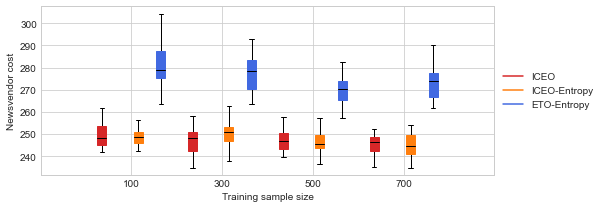

In [4]:
### Figure 3

# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='multi_layer'
dir = 'iceo_results/model-mis-specification-linear-multi-10-scenario'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [ 100, 300, 500, 700]#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label= 'ICEO-Entropy')
# plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
# plt.savefig('nv-plot-mis-K10-linear.pdf')

## Figure 2

In [7]:
def read_data(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            if method == 'entropy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                name = dir + '/'+method+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            # elif method == 'cvxpy':
            #     name = dir + '/'+method+ name_tail
            #     data = pd.read_csv(name)[method].values
            #     data = np.sort(data)
            #     data_list.append(data)
            # elif method =='forest0':
            #     name = dir + '/'+ method + name_tail
            #     data = pd.read_csv(name)['forest'].values
            #     data = np.sort(data)
            #     data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

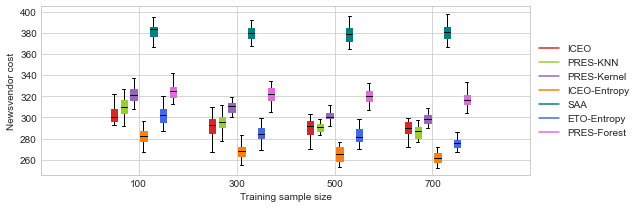

In [14]:
### Figure 2(c) # Num scenario = 15
# no cvxpy e2e version
# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/test-all-benchmark-dim15'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
forest = read_data(n_grid, deg_grid, dir, method = 'forest',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [ 100, 300, 500, 700]#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
# bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
set_box_color(bp8, 'orchid')
# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('nv-iid-K15.pdf')

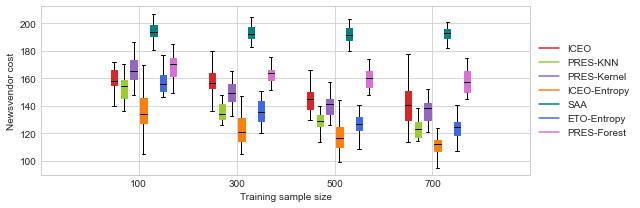

In [15]:
### Figure 2(b) # Num scenario = 10
# no cvxpy e2e version
# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/test-all-benchmark-dim10'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
forest = read_data(n_grid, deg_grid, dir, method = 'forest',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [ 100, 300, 500, 700]#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
# bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
set_box_color(bp8, 'orchid')
# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('nv-iid-K10.pdf')

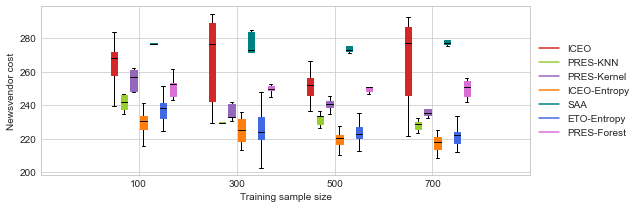

In [16]:
### Figure 2(a) # Num scenario = 5
# no cvxpy e2e version
# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/test-all-benchmark-dim5'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
forest = read_data(n_grid, deg_grid, dir, method = 'forest',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [ 100, 300, 500, 700]#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
# bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
set_box_color(bp8, 'orchid')
# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('nv-iid-K5.pdf')

## Figure 3

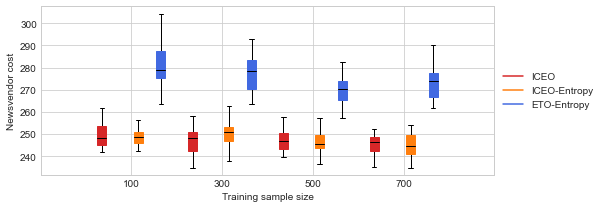

In [ ]:
### Figure 3

# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='multi_layer'
dir = 'iceo_results/model-mis-specification-linear-multi-10-scenario'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [ 100, 300, 500, 700]#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label= 'ICEO-Entropy')
# plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
# plt.savefig('nv-plot-mis-K10-linear.pdf')

## Figure 7

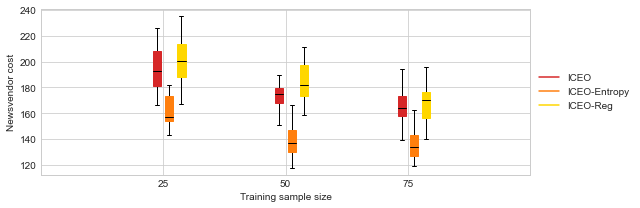

In [ ]:
# plot iceo reg entropy

# 20240522 # Num scenario = 15

# plot 
n_grid = [ 25, 50, 75] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2024-04-03_22-17-50'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
iceo_reg = read_data(n_grid, deg_grid, dir, method = 'iceo+reg',data_generation=data_generation)
np.set_printoptions(precision=2)


import numpy as np
ticks = n_grid#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp10 = plt.boxplot(iceo_reg, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True)
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
# bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
# # bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
# bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
# set_box_color(bp8, 'orchid')
set_box_color(bp10, 'gold')

# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
# plt.plot([], c='teal', label='SAA')
# plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
# plt.plot([], c='orchid', label='PRES-Forest')
plt.plot([], c='gold', label='ICEO-Reg')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('iceo-regu.pdf')

## Figure 8

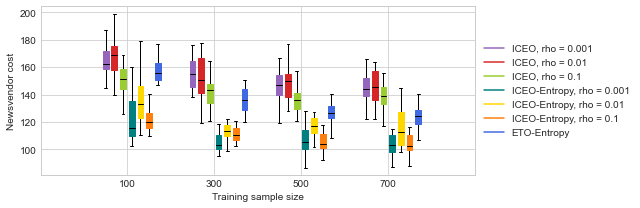

In [ ]:
# plot iceo reg entropy

# 20240522 # Num scenario = 15

# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir1 = 'iceo_results/2024-05-22_17-58-56' # rho = 0.1
dir = 'iceo_results/2023-05-17_17-46-43'# rho = 0.01
dir3 = 'iceo_results/2024-05-23_15-29-45'# rho = 0.001
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
iceo1 = read_data(n_grid, deg_grid, dir1, method = 'iceo', data_generation=data_generation)
iceo2 = read_data(n_grid, deg_grid, dir3, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy1 = read_data(n_grid, deg_grid, dir1, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy2 = read_data(n_grid, deg_grid, dir3, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
# iceo_reg = read_data(n_grid, deg_grid, dir, method = 'iceo+reg',data_generation=data_generation)
# cvxpy = read_data(n_grid, deg_grid, dir2, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation)
# e2e = read_data(n_grid, deg_grid, dir2, method = 'e2e',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid#

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.9, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(iceo1, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(iceo2, positions=np.array(range(len(ticks)))*a-1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy1, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp10 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True)
bp3 = plt.boxplot(iceo_entropy2, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# # bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
# bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
# set_box_color(bp8, 'orchid')
set_box_color(bp10, 'gold')

# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend


plt.plot([], c='tab:purple', label='ICEO, rho = 0.001')
plt.plot([], c='tab:red', label='ICEO, rho = 0.01')
plt.plot([], c='yellowgreen', label='ICEO, rho = 0.1')
plt.plot([], c='teal', label='ICEO-Entropy, rho = 0.001')
plt.plot([], c='gold', label='ICEO-Entropy, rho = 0.01')
plt.plot([], c='tab:orange', label='ICEO-Entropy, rho = 0.1')
plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
# plt.plot([], c='orchid', label='PRES-Forest')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('rho-comparison.pdf')

## Figure 9

[array([175.64, 177.31, 178.61, 180.03, 183.61, 185.58, 187.87, 187.91,
       188.89, 191.11, 193.05, 193.11, 195.25, 196.16, 198.72, 199.31,
       199.49, 201.31, 204.47, 208.28, 220.76, 221.1 , 226.55, 231.1 ,
       233.21]), array([157.88, 158.11, 158.38, 160.35, 162.29, 163.34, 165.95, 166.3 ,
       166.46, 167.17, 172.38, 176.36, 177.72, 180.47, 181.52, 182.86,
       187.49, 190.68, 193.25, 195.62, 200.56, 201.28, 209.12, 215.79,
       233.6 ]), array([157.62, 158.83, 159.59, 162.02, 168.29, 169.68, 171.22, 171.51,
       171.68, 172.84, 173.  , 173.42, 176.67, 180.26, 185.01, 185.86,
       187.18, 187.26, 191.19, 192.38, 193.1 , 195.22, 198.53, 206.82,
       206.95]), array([144.42, 147.21, 147.37, 147.79, 150.05, 150.51, 151.94, 152.28,
       152.38, 154.86, 154.89, 155.08, 156.21, 158.02, 165.53, 166.43,
       168.18, 169.35, 171.88, 173.9 , 177.97, 180.06, 182.18, 184.6 ,
       205.82]), array([127.46, 129.2 , 129.24, 133.78, 134.25, 138.76, 138.97, 140.21,
       1

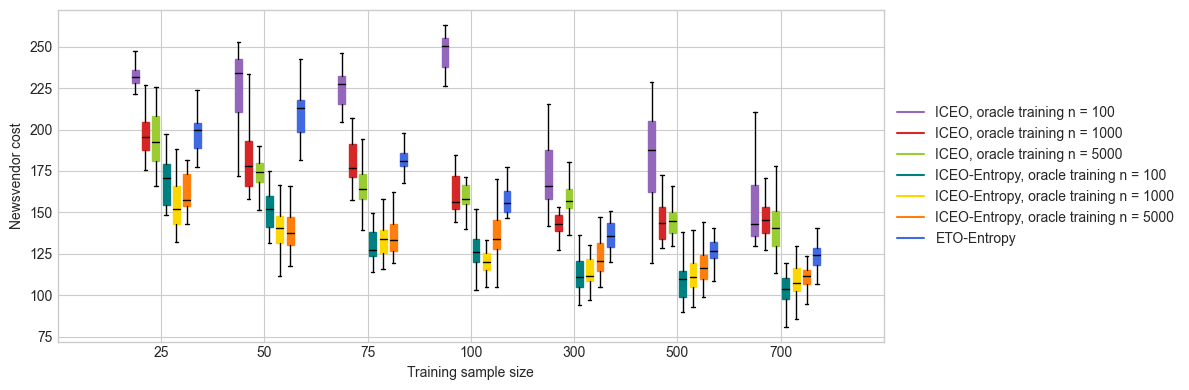

In [ ]:
# plot pw dataset size



n_grid = [25, 50, 75] #
deg_grid = [1]
data_generation ='two_layer'
dir1 = 'iceo_results/2024-04-03_22-17-50'# pw size  = 5000
dir3 = 'iceo_results/2024-06-05_14-00-19'# pwsize = 100
dir = 'iceo_results/2024-06-04_17-57-34'# pwsize = 1000
dir_entropy = 'iceo_results/2024-06-16_23-18-43'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
iceo1 = read_data(n_grid, deg_grid, dir1, method = 'iceo', data_generation=data_generation)
iceo2 = read_data(n_grid, deg_grid, dir3, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir_entropy, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy1 = read_data(n_grid, deg_grid, dir1, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy2 = read_data(n_grid, deg_grid, dir3, method = 'iceo+entropy',data_generation=data_generation)

# plot 
n_grid = [100, 300, 500, 700]#[ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir1 = 'iceo_results/test-all-benchmark-dim10/'# pw size  = 5000
dir3 = 'iceo_results/2024-05-24_11-56-43'# pwsize = 100
dir = 'iceo_results/2024-05-28_00-29-33'# pwsize = 1000
temp = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
iceo.extend(temp)
print(iceo )
temp = read_data(n_grid, deg_grid, dir1, method = 'iceo', data_generation=data_generation)
iceo1.extend(temp)
temp = read_data(n_grid, deg_grid, dir3, method = 'iceo', data_generation=data_generation)
iceo2.extend(temp)
# print(iceo2)
temp = read_data(n_grid, deg_grid, dir1, method ='entropy',data_generation=data_generation)
entropy.extend(temp)
temp = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy.extend(temp)
temp = read_data(n_grid, deg_grid, dir1, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy1.extend(temp)
temp = read_data(n_grid, deg_grid, dir3, method = 'iceo+entropy',data_generation=data_generation)
iceo_entropy2.extend(temp)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = [25, 50, 75, 100, 300, 500, 700]

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (12,4))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.9, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(iceo1, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(iceo2, positions=np.array(range(len(ticks)))*a-1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy1, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp10 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True)
bp3 = plt.boxplot(iceo_entropy2, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# # bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(ticks)))*a+2.7, sym='', widths=wd, patch_artist = True, vert=True )
# bp8 = plt.boxplot(forest, positions=np.array(range(len(ticks)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# bp9 = plt.boxplot(e2e, positions=np.array(range(len(ticks)))*a+3.3, sym='', widths=wd, patch_artist = True, vert=True )
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
# set_box_color(bp7, 'tan')
# set_box_color(bp8, 'orchid')
set_box_color(bp10, 'gold')

# set_box_color(bp9, 'lightseagreen')

# draw temporary red and blue lines and use them to create a legend


plt.plot([], c='tab:purple', label='ICEO, oracle training n = 100')
plt.plot([], c='tab:red', label='ICEO, oracle training n = 1000')
plt.plot([], c='yellowgreen', label='ICEO, oracle training n = 5000')
plt.plot([], c='teal', label='ICEO-Entropy, oracle training n = 100')
plt.plot([], c='gold', label='ICEO-Entropy, oracle training n = 1000')
plt.plot([], c='tab:orange', label='ICEO-Entropy, oracle training n = 5000')
plt.plot([], c='royalblue', label='ETO-Entropy')
# plt.plot([], c='tan', label='Opt-Net')
# plt.plot([], c='orchid', label='PRES-Forest')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
plt.savefig('oracle-sample.pdf')

## Figure 10 (a) (b)

In [ ]:
def read_data2(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = data_generation+'-'+'degntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = data_generation+'-'+'degntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = data_generation+'-'+'degntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            # name_tail_reg = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+'reg'+str(True)+'.csv'
            if method == 'entropy':
                method_name = 'entropy_model '
                name = dir + '/'+method_name+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo+reg' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_reg
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)


            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            elif method =='forest0':
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)['forest'].values
                data = np.sort(data)
                data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

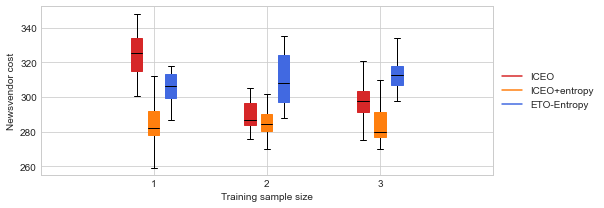

In [ ]:
## Figure 10 (a)

# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-09_08-56-48'
entropy_dir = 'iceo_results/2024-08-09_08-56-55'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.6, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+0.6, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()

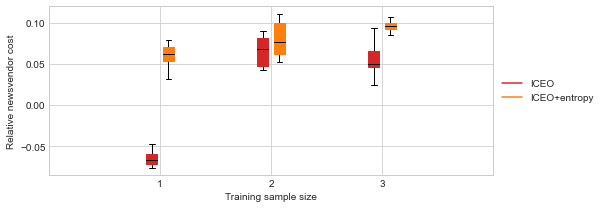

In [ ]:
## Figure 10 (b)

# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-09_08-56-48'
entropy_dir = 'iceo_results/2024-08-09_08-56-55'
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot([(b-a)/b for a, b in zip(iceo, entropy)], positions=np.array(range(len(iceo)))*a-0.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot([(b-a)/b for a, b in zip(iceo_entropy, entropy)], positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp2 = plt.boxplot([(a - b)/b for a, b in zip(entropy, entropy)], positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
# plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Relative newsvendor cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')